# Simple text classification using ```scikit-learn```

## Import packages


In [22]:
# system tools
import os
import sys
sys.path.append("..")

# data munging tools
import pandas as pd
#import utils.classifier_utils as clf

# Machine learning stuff
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt

## Reading in the data

Our data is already in a tabular format, so we're going to load it using ```pandas```

In [23]:
filename = os.path.join("..", "..", "..", "431868", "classification_data", "fake_or_real_news.csv")

data = pd.read_csv(filename, index_col=0)

__Inspect data__

In [24]:
data.sample(10) #printing 10  random values 

,title,text,label
8526,CETA Is Step towards a Corporate Land Called E...,3 Shares\n2 0 0 1\nThe signing of the Comprehe...,FAKE
314,"In the United States, anxiety is up, but crime...","Felony crime declined nationwide in 2015, cont...",REAL
3055,"If you use Facebook to get your news, please —...",Facebook’s 1.44 billion users rely on the site...,REAL
6614,Muslims Terrorize Hindus Because It's Wednesday,Muslims Terrorize Hindus Because It's Wednesda...,FAKE
1397,How Predictive Are Iowa And New Hampshire?,How Predictive Are Iowa And New Hampshire?\n\n...,REAL
3214,Paul Ryan Says Government Won't Shut Down Beca...,WASHINGTON -- Rep. Paul Ryan (R-Wis.) is confi...,REAL
6319,Vortex Structured Water [Video],This video shows you how to structure water in...,FAKE
5121,Picking Mike Pence Really Was A Grand Slam For...,Mike Pence? Full disclosure: I served as head ...,REAL
2787,"Obama to keep 5,500 US troops in Afghanistan b...",President Obama announced Thursday he will kee...,REAL
1639,"Trump in Vegas, Phoenix: Illegals 'Wreaking Ha...",Republican presidential hopeful Donald Trump c...,REAL


In [25]:
data.shape #6335 rows and 3 colums

(6335, 3)

<br>
Q: How many examples of each label do we have?

In [26]:
data["label"].value_counts() #important to have balanced data

REAL    3171
FAKE    3164
Name: label, dtype: int64

<br>

Let's now create new variables called ```X``` and ```y```, taking the data out of the dataframe so that we can mess around with them.

In [27]:
X = data["text"]
y = data["label"]

In [28]:
type(X) #pandas series = 1 column in a dataframe, basically a fancy list

pandas.core.series.Series

## Train-test split

I've included most of the 'hard work' for you here already, because these are long cells which might be easy to mess up while live-coding.

Instead, we'll discuss what's happening. If you have questions, don't be shy!

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,           # texts for the model
                                                    y,          # classification labels
                                                    test_size=0.2,   # create an 80/20 split
                                                    random_state=42) # random state for reproducibility

## Vectorizing and Feature Extraction

Vectorization. What is it and why are all the cool kids talking about it?

Essentially, vectorization is the process whereby textual or visual data is 'transformed' into some kind of numerical representation. One of the easiest ways to do this is to simple count how often individual features appear in a document.

Take the following text: 
<br><br>
<i>My father’s family name being Pirrip, and my Christian name Philip, my infant tongue could make of both names nothing longer or more explicit than Pip. So, I called myself Pip, and came to be called Pip.</i>
<br>

We can convert this into the following vector

| and | be | being | both | called | came | christian | could | explicit | family | father | i | infant | longer | make | more | my | myself | name | names | nothing | of | or | philip | pip | pirrip | s | so | than | to | tongue|
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |  --- |
| 2 | 1 | 1 | 1 | 2 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 3 | 1 | 2 | 1 | 1 | 1 | 1 | 1 | 3 | 1 | 1 | 1 | 1 | 1 | 1 |

<br>
Our textual data is hence reduced to a jumbled-up 'vector' of numbers, known somewhat quaintly as a <i>bag-of-words</i>.
<br>
<br>
To do this in practice, we first need to create a vectorizer. 

Tfidf vectors tend to be better for training classifiers. Why might that be?

__Create vectorizer object__

Another type of vectorizer

In [30]:
vectorizer1 = TfidfVectorizer(ngram_range = (1,2),     # unigrams and bigrams (1 word and 2 word units)
                             lowercase =  True,       # why use lowercase?
                             max_df = 0.95,           # remove very common words
                             min_df = 0.05,           # remove very rare words
                             max_features = 100)      # keep only top 100 features

__Create COUNT vectorizer object__ <br>
basically: lav et object der hedder "vectorizer" (virkelig cool navn), der kan finde de vigtigste ord og lave dem til en vector.

In [31]:
vectorizer = CountVectorizer(ngram_range = (1,2),     # unigrams and bigrams (1 word and 2 word units) så "to New York", new står ved siden af "to" og "york"
                             lowercase =  True,       # why use lowercase?
                             max_df = 0.95,           # remove very common words, fjerne alt der occurs i 95% af teksterne (stopwords)
                             min_df = 0.05,           # remove very rare words, fjerne alt der occurs i 5% af teksterne (OUTLIERS) (rare words, der ikke biddrager til classification, men til overfitting)
                             max_features = 100)      # keep only top 100 features (after removal of all above), this creates a 100 dimension vector

# basically gives 100 words (in a vectorizer) in the data that we wanna predict

This vectorizer is then used to turn all of our documents into a vector of numbers, instead of text.

Basically: brug vectorizer (important-words-object) til at finde de vigtige ord i X-train og X-test

In [32]:
# first we fit to the training data...
X_train_feats = vectorizer.fit_transform(X_train) #80% af dataen og dets 100 features -FITTED

#... then do it for our test data
X_test_feats = vectorizer.transform(X_test) #20% af dataen og dets 100 features - TRANSFORMED

# get feature names (DE VIGTIGSTE ORD OG DERES NAVN)
feature_names = vectorizer.get_feature_names_out()

In [33]:
#the top 100 words
feature_names 
#note: bigrams is for example "and the" (two words appearing together frequently)

array(['about', 'after', 'all', 'also', 'an', 'and', 'and the', 'are',
       'as', 'at', 'at the', 'be', 'because', 'been', 'but', 'by',
       'campaign', 'can', 'clinton', 'could', 'do', 'even', 'first',
       'for', 'for the', 'from', 'had', 'has', 'have', 'he', 'her',
       'hillary', 'him', 'his', 'how', 'if', 'in', 'in the', 'into', 'is',
       'it', 'its', 'just', 'like', 'many', 'more', 'most', 'new', 'no',
       'not', 'now', 'obama', 'of', 'of the', 'on', 'on the', 'one',
       'only', 'or', 'other', 'our', 'out', 'over', 'party', 'people',
       'president', 'republican', 'said', 'she', 'so', 'some', 'state',
       'states', 'than', 'that', 'that the', 'their', 'them', 'there',
       'they', 'this', 'time', 'to be', 'to the', 'trump', 'two', 'up',
       'us', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will',
       'with', 'with the', 'would', 'you'], dtype=object)

## Classifying and predicting

We now have to 'fit' the classifier to our data. This means that the classifier takes our data and finds correlations between features and labels.

These correlations are then the *model* that the classifier learns about our data. This model can then be used to predict the label for new, unseen data.

In [34]:
classifier = LogisticRegression(random_state=42).fit(X_train_feats, y_train) #ud fra de vigtige 100 ord i train, predict y

Q: How do we use the classifier to make predictions?

In [35]:
y_pred = classifier.predict(X_test_feats) # predictions of Y

Q: What are the predictions for the first 20 examples of the test data?

In [36]:
print(y_pred[:20]) #husk y er labels

['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'FAKE'
 'FAKE' 'REAL' 'REAL' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'REAL' 'REAL']


We can also inspect the model, in order to see which features are most informative when trying to predict a label. 

To do this, we can use the ```show_features``` function that I defined earlier - how convenient!

Q: What are the most informative features? Use ```show_features``` to find out!

In [37]:
clf.show_features(vectorizer, y_train, classifier, n=20)
#these numbers can be understood as the weights of predicting the words
#these numbers are hard to interpret, and we dont know how good the model performs

NameError: name 'clf' is not defined

## Evaluate

We can also do some quick calculations, in order to assess just how well our model performs.

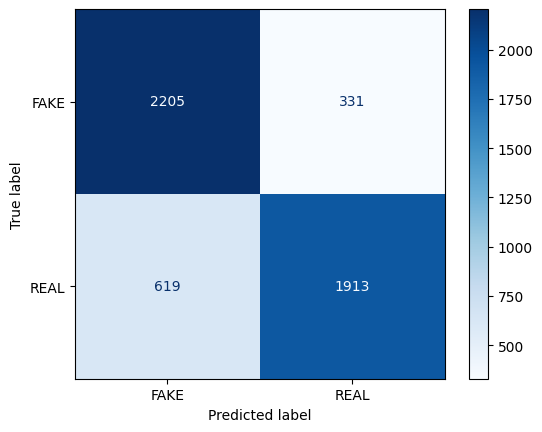

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(classifier,           # the classifier name
                                            X_train_feats,          # the training features
                                            y_train,                # the training labels
                                            cmap=plt.cm.Blues,      # make the colours prettier
                                            labels=["FAKE", "REAL"])# the labels in your data arranged alphabetically

This confusion matrix can be broken down a little bit more and used to draw more meaningful statistical results:

<img src="../img/confusionMatrix.jpg" alt="Alternative text" />

__Calculating metrics__

```scikit-learn``` has a built-in set of tools which can be used to calculate these metrics, to get a better idea of how our model is performing.

In [47]:
classifier_metrics = metrics.classification_report(y_test, y_pred) #loss function
#print(classifier_metrics)
#over all accuracy 0.82

classifier_metrics
#type(classifier_metrics)

'              precision    recall  f1-score   support\n\n        FAKE       0.79      0.86      0.83       628\n        REAL       0.85      0.78      0.81       639\n\n    accuracy                           0.82      1267\n   macro avg       0.82      0.82      0.82      1267\nweighted avg       0.82      0.82      0.82      1267\n'

## Cross validation and further evaluation

One thing we can't be sure of is that our model performance is simply related to how the train-test split is made.

To try to mitigate this, we can perform cross-validation, in order to test a number of different train-test splits and finding the average scores.

Let's do this on the full dataset:

In [ ]:
X_vect = vectorizer.fit_transform(X)

NameError: name 'vectorizer' is not defined

The first plot is probably the most interesting. Some terminology:

- If two curves are "close to each other" and both of them but have a low score, the model suffers from an underfitting problem (High Bias)

- If there are large gaps between two curves, then the model suffer from an overfitting problem (High Variance)


/home/coder/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/coder/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

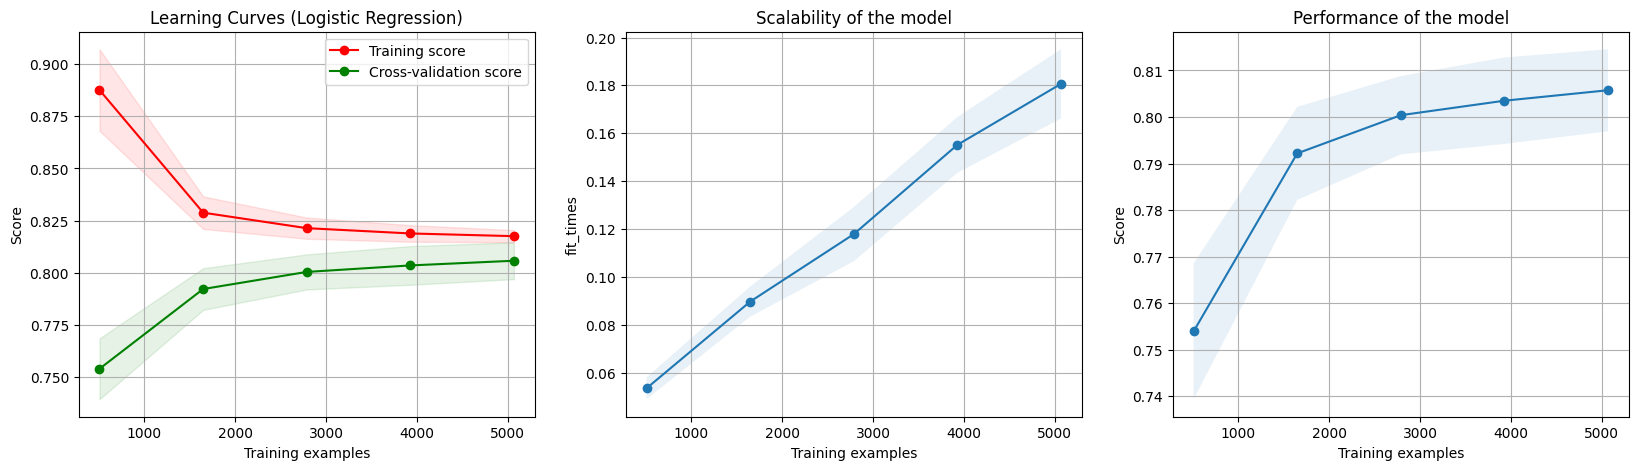

In [ ]:
title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression(random_state=42)
clf.plot_learning_curve(estimator, title, X_vect, y, cv=cv, n_jobs=12)

- The second plot shows how model performance scales when more data is added;
- The third plot shows how much of a performance improvement we get from adding more data

## Save models

It is also somewhat trivial to save models and reload them for later use. For that, we can use the library ```joblib```.

In [ ]:
from joblib import dump, load
dump(classifier, "LR_classifier.joblib")
dump(vectorizer, "tfidf_vectorizer.joblib")
#if I restart my notebook, I have now saved my models that I can reload them and use them imediately. See below

['tfidf_vectorizer.joblib']

We can restart the kernel for our notebook to see how that works:

In [ ]:
from joblib import dump, load
loaded_clf = load("LR_classifier.joblib")
loaded_vect = load("tfidf_vectorizer.joblib")

In [ ]:
sentence = "Hilary Clinton is a crook who eats babies!"

In [ ]:
test_sentence = loaded_vect.transform([sentence])
loaded_clf.predict(test_sentence)

array(['FAKE'], dtype=object)

## Appendix - Interpreting a confusion matrix

Imagine that we are testing a classifier to see how well it can predict if someone has COVID:


```Accuracy => (TP+TN)/(TP+FP+FN+TN)```
- Ratio of correct classifications across all of the patients

```True Positive Rate => Recall  => Sensitivity => (TP / TP + FN)```
- The proportion of the positive class who were correctly classified
    - I.e sick people correctly identified as being sick

```Precision =>  (TP / TP + FP)```
- The ration of true positives to everyone predicted as positive
    - I.e. the proportion we identify as having COVID who actually do have it

```True negative rate => Specificity => (TN / TN + FP)```
- The proportion of the negative class who were correctly classified
    - I.e. healthy people who were correctly identified as being healthy

The following can also be calculated but are not featured on the confusion matrix above:

```False negative rate => (FN / TP + FN)```
- Proportion of the positive class who were incorrectly classified by the classifier
  - I.e. people predicted as healthy who are actually sick

```False positive rate = (FP / TN + FP) = 1 - Specificity```
- Proportion of the negative class who were incorrectly classified by the classifier
  - I.e. people predicted as sick who are actually healthy

```F1 => 2(P*R / P + R)```
- Harmonic mean of precision and recall, useful where both precision and recall are important